# Project 8 - Space Server Dataset (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df_ss = pd.read_csv('Data/space_server.csv')
df_ss.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
# Checking the shape of the columns
df_ss.shape

(10000, 18)

In [4]:
# Checking the columns
df_ss.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
# Checking the datatypes of columns
df_ss.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

Observation: All the data contains numeric except the class, The numeric data it consists of int and float . The class is object

In [6]:
# Checking the information of the dataset

df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Observation: The data is numeric except the class feature

## To check the missing values

In [7]:
df_ss.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

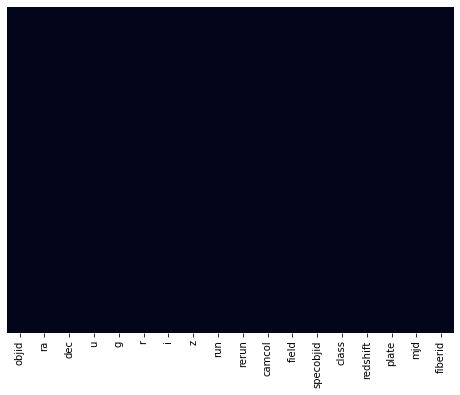

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_ss.isnull(), yticklabels=False, cbar=False)

Observation: No missing values are present

### Dropping Unwanted columns

In [9]:
df_ss.drop(columns=['objid','specobjid'],inplace=True)

### Converting Categorical to Numeric

In [10]:
# Transform Non-Numeric columns into numeric columns

from sklearn.preprocessing import LabelEncoder


df_ss['class'] = LabelEncoder().fit_transform(df_ss['class'])

## Summary Statstics

In [11]:
df_ss.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000,1000.000000


Observation:
    
    1. ra max is 260.8 and min is 8.2
    
    2. dec max income is 68.5 and min is -5.38
    
    3. For ra, dec, z, run, field, redshift, plate, mjd,fiberid mean is greater than median therefore data is right skewd for these attriutes

## Correlation

In [12]:
df_ss.corr()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.043219,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,-0.058918,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.269044,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.099212,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.049628,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.146791,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.215758,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,-0.078162,0.059056,0.093601,0.070354,0.138566
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,NaN,1.000000,-0.067921,-0.006186,0.006834,0.040795,0.026284,0.535629


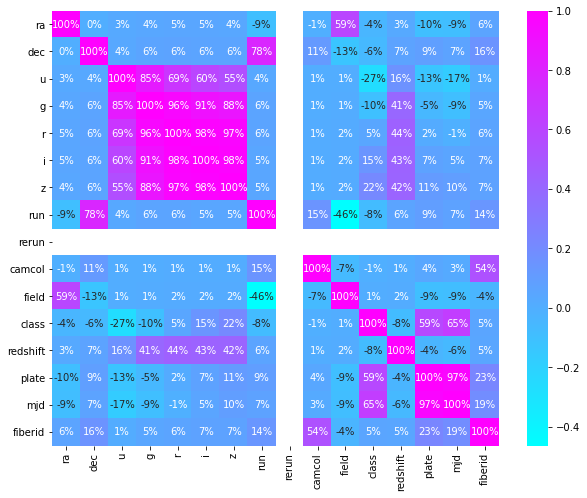

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ss.corr(), annot=True, fmt='.0%', cmap='cool')

Observation:
    
    1. There is no correlation with rerun

In [14]:
# Dropping the rerun column as no correlation

df_ss.drop(columns='rerun',inplace=True)

In [15]:
df_ss.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

## Visualization

0 stands for GALAXY, 1 stands for QSO and 2 stands for STAR

Text(0.5, 1.0, 'Correlation with class variable')

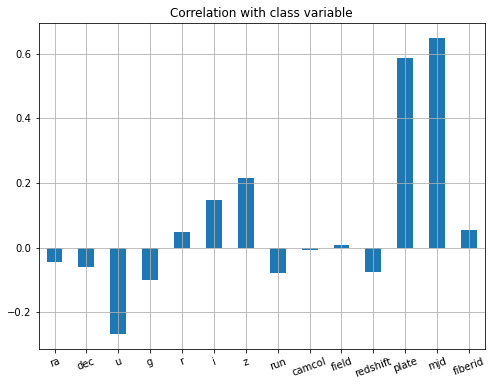

In [16]:
plt.figure(figsize=(8,6))
df_ss.drop('class', axis=1).corrwith(df_ss['class']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title('Correlation with class variable')

Observation:
    
    1. ra, dec, u, g, ryn, camcol, field, redshift are negatively correlated with the class variable
    
    2. r, i, z, plate, mjd are positively correlated with class variable
    
    3. plate and mjd are highly correlated with class variable among all input variable

### Univarient Analysis

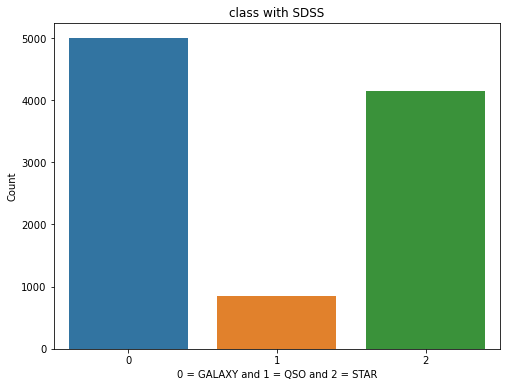

0    4998
2    4152
1     850
Name: class, dtype: int64


In [17]:
# Checking income count of the people

plt.subplots(figsize=(8,6))
sns.countplot(x='class', data=df_ss)
plt.title('class with SDSS')
plt.xlabel('0 = GALAXY and 1 = QSO and 2 = STAR')
plt.ylabel('Count')
plt.show()

print(df_ss['class'].value_counts())

Observation: Galaxy is having 4998 count, QSO is having 4152 count and STAR is having 850

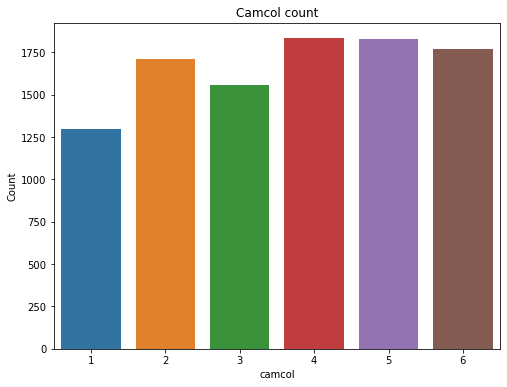

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [18]:
plt.subplots(figsize=(8,6))
sns.countplot(x='camcol', data=df_ss)
plt.title('Camcol count')
plt.xlabel('camcol')
plt.ylabel('Count')
plt.show()

print(df_ss.camcol.value_counts())

### BiVarient Analysis

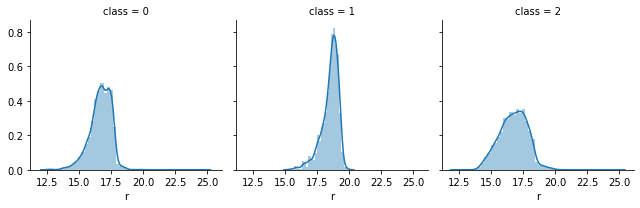

In [19]:
# Exploring Applicant_Income vs Loan_Status via Facegrid

facet = sns.FacetGrid(df_ss, col='class')
facet.map(sns.distplot, 'r')
plt.show()

### MultiVarient Analysis

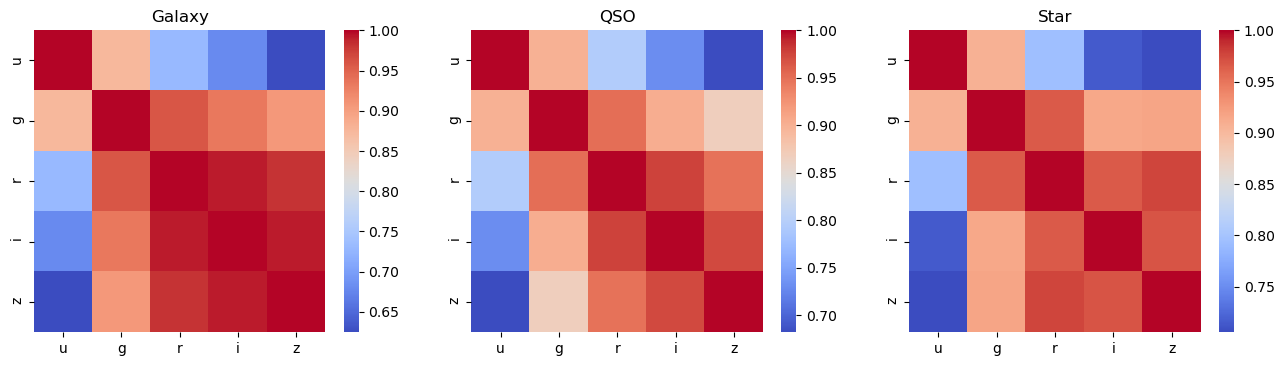

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df_ss[df_ss['class']==0][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Galaxy')
ax = sns.heatmap(df_ss[df_ss['class']==1][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('QSO')
ax = sns.heatmap(df_ss[df_ss['class']==2][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('Star')

Text(0.5, 1.0, 'Equatorial coordinates')

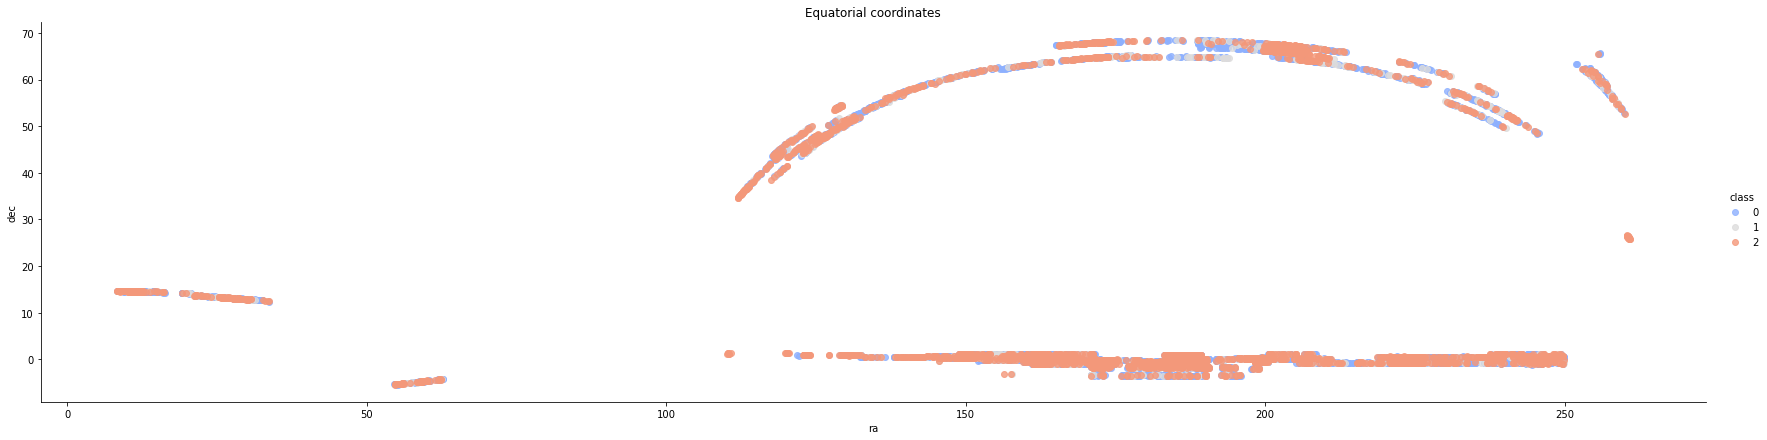

In [21]:
# Class: 0 - Galaxy, 1 - QSO, 2 - Star
sns.lmplot(x='ra', y='dec', data=df_ss, hue='class', fit_reg=False, palette='coolwarm', size=6, aspect=4)
plt.title('Equatorial coordinates')

Observation: There are few outliers present for stars and galaxies but for the coordinates are within the same range.

### Skewness

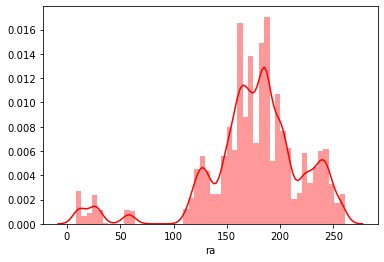

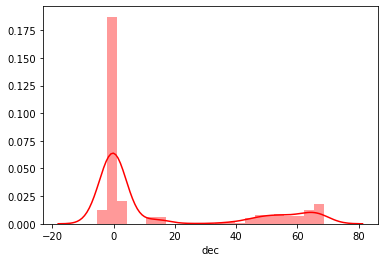

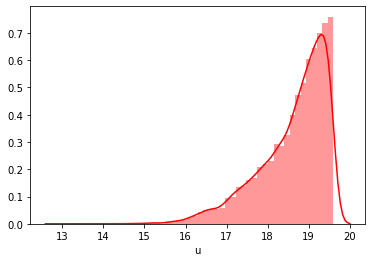

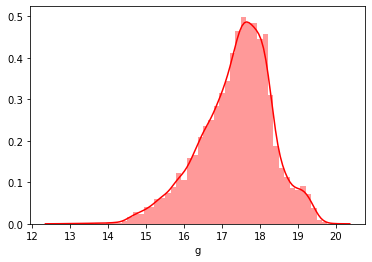

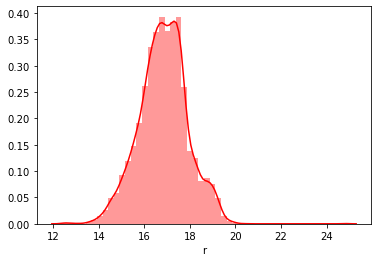

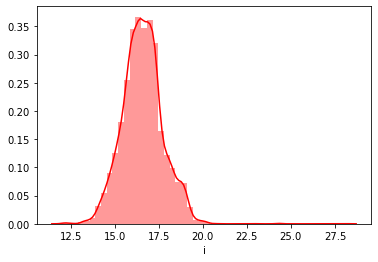

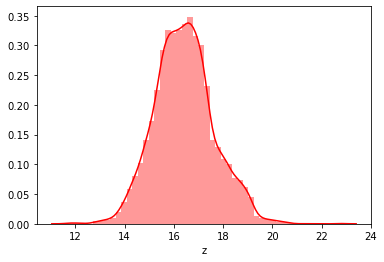

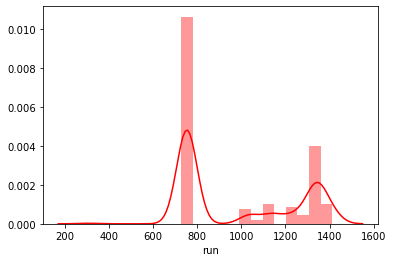

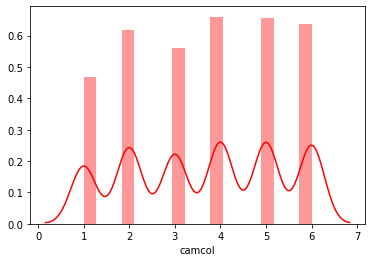

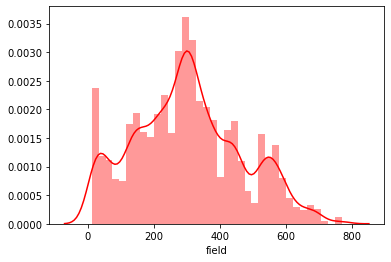

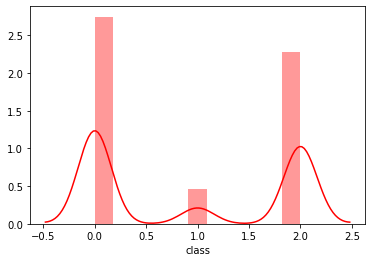

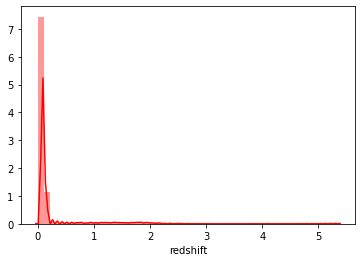

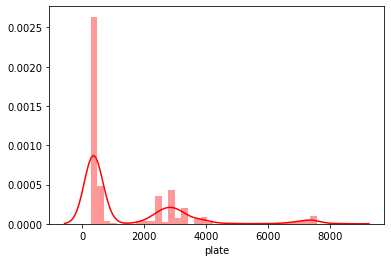

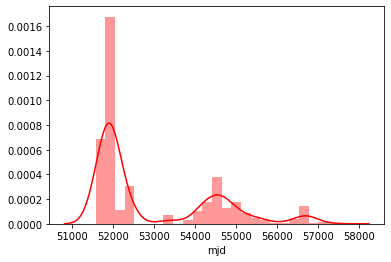

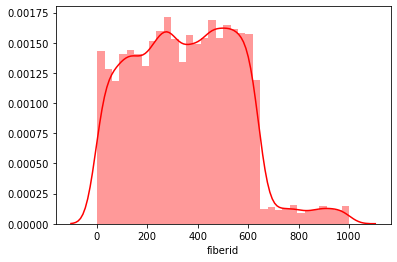

In [22]:
for i in df_ss.describe().columns:
    sns.distplot(df_ss[i], color='r')
    plt.show()

In [23]:
df_ss.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

## Plotting the Outliers

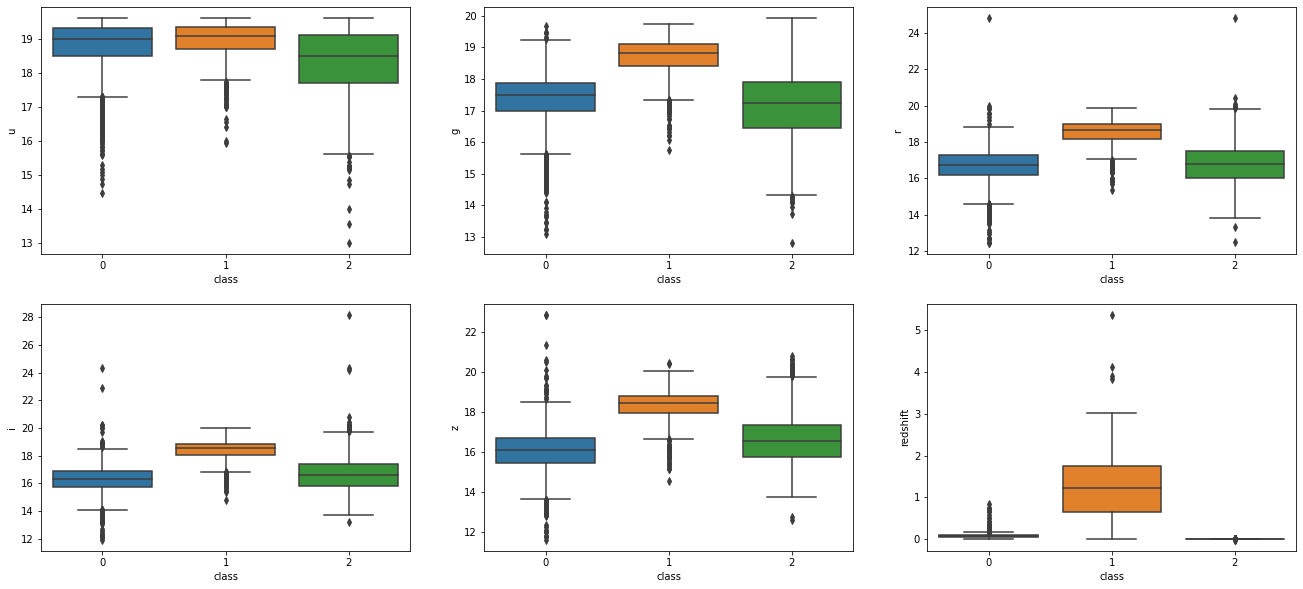

In [24]:
f, axs = plt.subplots(2,3, figsize=(22.5,10))
sns.boxplot(data=df_ss, y='u', x='class', ax=axs[0, 0])
sns.boxplot(data=df_ss, y='g', x='class', ax=axs[0, 1])
sns.boxplot(data=df_ss, y='r', x='class', ax=axs[0, 2])
sns.boxplot(data=df_ss, y='i', x='class', ax=axs[1, 0])
sns.boxplot(data=df_ss, y='z', x='class', ax=axs[1, 1])
sns.boxplot(data=df_ss, y='redshift', x='class', ax=axs[1, 2])

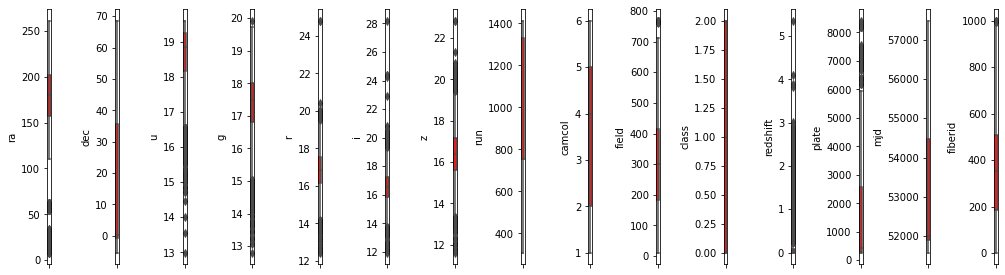

In [25]:
col = df_ss.columns.values
ncol = 16
nrow = 16

plt.figure(figsize=(15, 60))
for i in range(0, len(col)):
    if col[i] in ['ra','dec','u','g','r','i','z','run','camcol','field','class','redshift','plate','mjd','fiberid']:
        plt.subplot(nrow, ncol, i+1)
        sns.boxplot(df_ss[col[i]], color='red', orient='v')
        plt.tight_layout()

## Model Training

In [26]:
# Splitting the data into input and output variables

x= df_ss.drop(columns=['class'], axis=1)
y = df_ss['class']

In [27]:
# Scaling in input variables

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

In [28]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Importing the model library

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import Error Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [32]:
model = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier(), RidgeClassifier()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, predm))
    print('\nClassification Report : \n', classification_report(y_test, predm))
    print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is 0.97675
Accuracy_score: 0.9775
Confusion Matrix : 
 [[970   2  28]
 [  9 161   0]
 [  6   0 824]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.99      0.95      0.97       170
           2       0.97      0.99      0.98       830

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

F1 Score:  97.75

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is 0.930625
Accuracy_score: 0.8965
Confusion Matrix : 
 [[936   2  62]
 [ 13 152   5]
 [124   1 705]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1000
           1       0.98      0.89     

In [33]:
# Cross_val_score

model = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier(), RidgeClassifier()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, y, cv=5, scoring = 'accuracy')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is [0.9775 0.981  0.976  0.971  0.977 ]
Mean score:  0.9765
Std score :  0.003224903099319426
Min score :  0.971
Max score :  0.981

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is [0.8935 0.9155 0.885  0.8755 0.887 ]
Mean score:  0.8913
Std score :  0.013403730823916157
Min score :  0.8755
Max score :  0.9155

*************** SVC() Model ***************

Score of SVC() Model is [0.9625 0.9655 0.951  0.929  0.9555]
Mean score:  0.9526999999999999
Std score :  0.012901937838944963
Min score :  0.929
Max score :  0.9655

*************** GaussianNB() Model ***************

Score of GaussianNB() Model is [0.9815 0.982  0.97   0.9525 0.9635]
Mean score:  0.9699
Std score :  0.011177656283854856
Min score :  0.9525
Max score :  0.982

*************** DecisionTreeClassifier() Model ***************

Score of DecisionTreeClassifier() Model is [0

Observation:

From above models, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier gives the best results

We use the GridSearchCV to find the best parameters and check the score and after that we finalized our model

#### Using GridSearchCV to find out the best parameters in RandomForestClassifier

In [35]:
params = { 
    'n_estimators': [10, 100, 200],
    'max_features': ['auto', 'sqrt'], 
    'random_state': range(35, 50),
}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, params)
clf.fit(x, y)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'max_features': 'auto', 'n_estimators': 100, 'random_state': 48}


In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=48, max_features='auto')

# RandomForestClassifier(100)  --> by Default

rf.fit(x_train, y_train)
predrf= rf.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, predrf))
print('Confusion Matrix : \n', confusion_matrix(y_test, predrf))
print('\nClassification Report : \n', classification_report(y_test, predrf))
print('F1 Score: ',round(f1_score(y_test, predrf, average='micro')*100,2))

Accuracy Score:  0.9915
Confusion Matrix : 
 [[992   2   6]
 [  9 161   0]
 [  0   0 830]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.95      0.97       170
           2       0.99      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

F1 Score:  99.15


In [37]:
# Cross validation
cv_score = cross_val_score(rf, x, y, cv=5, scoring = 'accuracy')
print('Score of %s Model is %s' % (rf, cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score of RandomForestClassifier(random_state=48) Model is [0.99  0.992 0.991 0.984 0.989]
Mean score:  0.9892
Std score :  0.002785677655436826
Min score :  0.984
Max score :  0.992


#### Using GridSearchCV to find out the best parameters in GradientBoostingClassifier

In [38]:
gbc = GradientBoostingClassifier()

grid = dict(learning_rate=[0.001, 0.01, 0.1, 1], n_estimators=[10, 100, 200])

clf = GridSearchCV(gbc, params)
clf.fit(x, y)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'max_features': 'auto', 'n_estimators': 200, 'random_state': 45}


In [39]:
gbc = GradientBoostingClassifier(max_features='auto', n_estimators=200, random_state=45)

# RandomForestClassifier(100)  --> by Default

gbc.fit(x_train, y_train)
predgbc= gbc.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, predgbc))
print('Confusion Matrix : \n', confusion_matrix(y_test, predgbc))
print('\nClassification Report : \n', classification_report(y_test, predgbc))
print('F1 Score: ',round(f1_score(y_test, predgbc, average='micro')*100,2))

Accuracy Score:  0.992
Confusion Matrix : 
 [[995   2   3]
 [  9 161   0]
 [  1   1 828]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.95      0.96       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

F1 Score:  99.2


In [40]:
# Cross validation
cv_score = cross_val_score(gbc, x, y, cv=5, scoring = 'accuracy')
print('Score of %s Model is %s' % (gbc, cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score of GradientBoostingClassifier(max_features='auto', n_estimators=200,
                           random_state=45) Model is [0.9935 0.9895 0.987  0.987  0.9905]
Mean score:  0.9895000000000002
Std score :  0.002428991560298249
Min score :  0.987
Max score :  0.9935


#### Using GridSearchCV to find out the best parameters in BaggingClassifier

In [41]:
params = { 
    'n_estimators': [10, 100, 200],
    'random_state': range(35, 60),
}

bc = BaggingClassifier()

clf = GridSearchCV(bc, params)
clf.fit(x, y)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'n_estimators': 200, 'random_state': 50}


In [42]:
bc = BaggingClassifier(n_estimators=200, random_state=50)

# RandomForestClassifier(100)  --> by Default

bc.fit(x_train, y_train)
predbc= bc.predict(x_test)

print('Accuracy Score: ',accuracy_score(y_test, predbc))
print('Confusion Matrix : \n', confusion_matrix(y_test, predbc))
print('\nClassification Report : \n', classification_report(y_test, predbc))
print('F1 Score: ',round(f1_score(y_test, predbc, average='micro')*100,2))

Accuracy Score:  0.991
Confusion Matrix : 
 [[991   3   6]
 [  9 161   0]
 [  0   0 830]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.95      0.96       170
           2       0.99      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

F1 Score:  99.1


In [43]:
# Cross validation
cv_score = cross_val_score(bc, x, y, cv=5, scoring = 'accuracy')
print('Score of %s Model is %s' % (bc, cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score of BaggingClassifier(n_estimators=200, random_state=50) Model is [0.991  0.993  0.9915 0.984  0.9905]
Mean score:  0.99
Std score :  0.003114482300479497
Min score :  0.984
Max score :  0.993


Observation: GradientBoostingClassifier is working well with GridSearchCV beacuse it gives the best accuracy_score and also it is not suffering from overfitting and Underfitting

In [45]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predgbc, columns=['Predictions']).to_csv('Data/Predicted_space_server.csv')

In [46]:
# Saving RandomForestRegressor

import joblib
joblib.dump(gbc, 'gbc_space_server.pkl')

['gbc_space_server.pkl']

## Conclusion:
We tried a Grid Search then using the GradientBoostingClassifier Method, to find the best Hyperprarameters!

Here, our Hyperparamter Tuning was more focussed on Getting a Better Macro F1 Score! -> 99.2% overall